### Ćwiczenie 1
Celem ćwiczenia było: 

1. Napisanie skryptu w Pythonie umożliwiającego wczytywanie i wizualizację badanych sygnałów. 
   * ekg1.txt – 12 kolumn odpowiada odprowadzeniom, fs = 1000 Hz
   * ekg100.txt – 1 kolumna, fs = 360 Hz
   * ekg_noise.txt – 1 kolumna: czas, 2 kolumna: wartości amplitud EKG, fs = 360 Hz

2. Umożliwienie obserwacji wycinka sygnału

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Ładowanie wybranego pliku
file_name = "..//src//"+input("Podaj nazwe pliku z danymi: ")

data_frame = pd.read_csv(file_name,sep="\\s+",header=None,engine="python")


Po załadowaniu pliku .txt są trzy możliwości

1. Plik ma 12 kolumn z danymi
2. Plik ma 2 kolumny z danymi
3. Plik ma 1 kolumnę z danymi


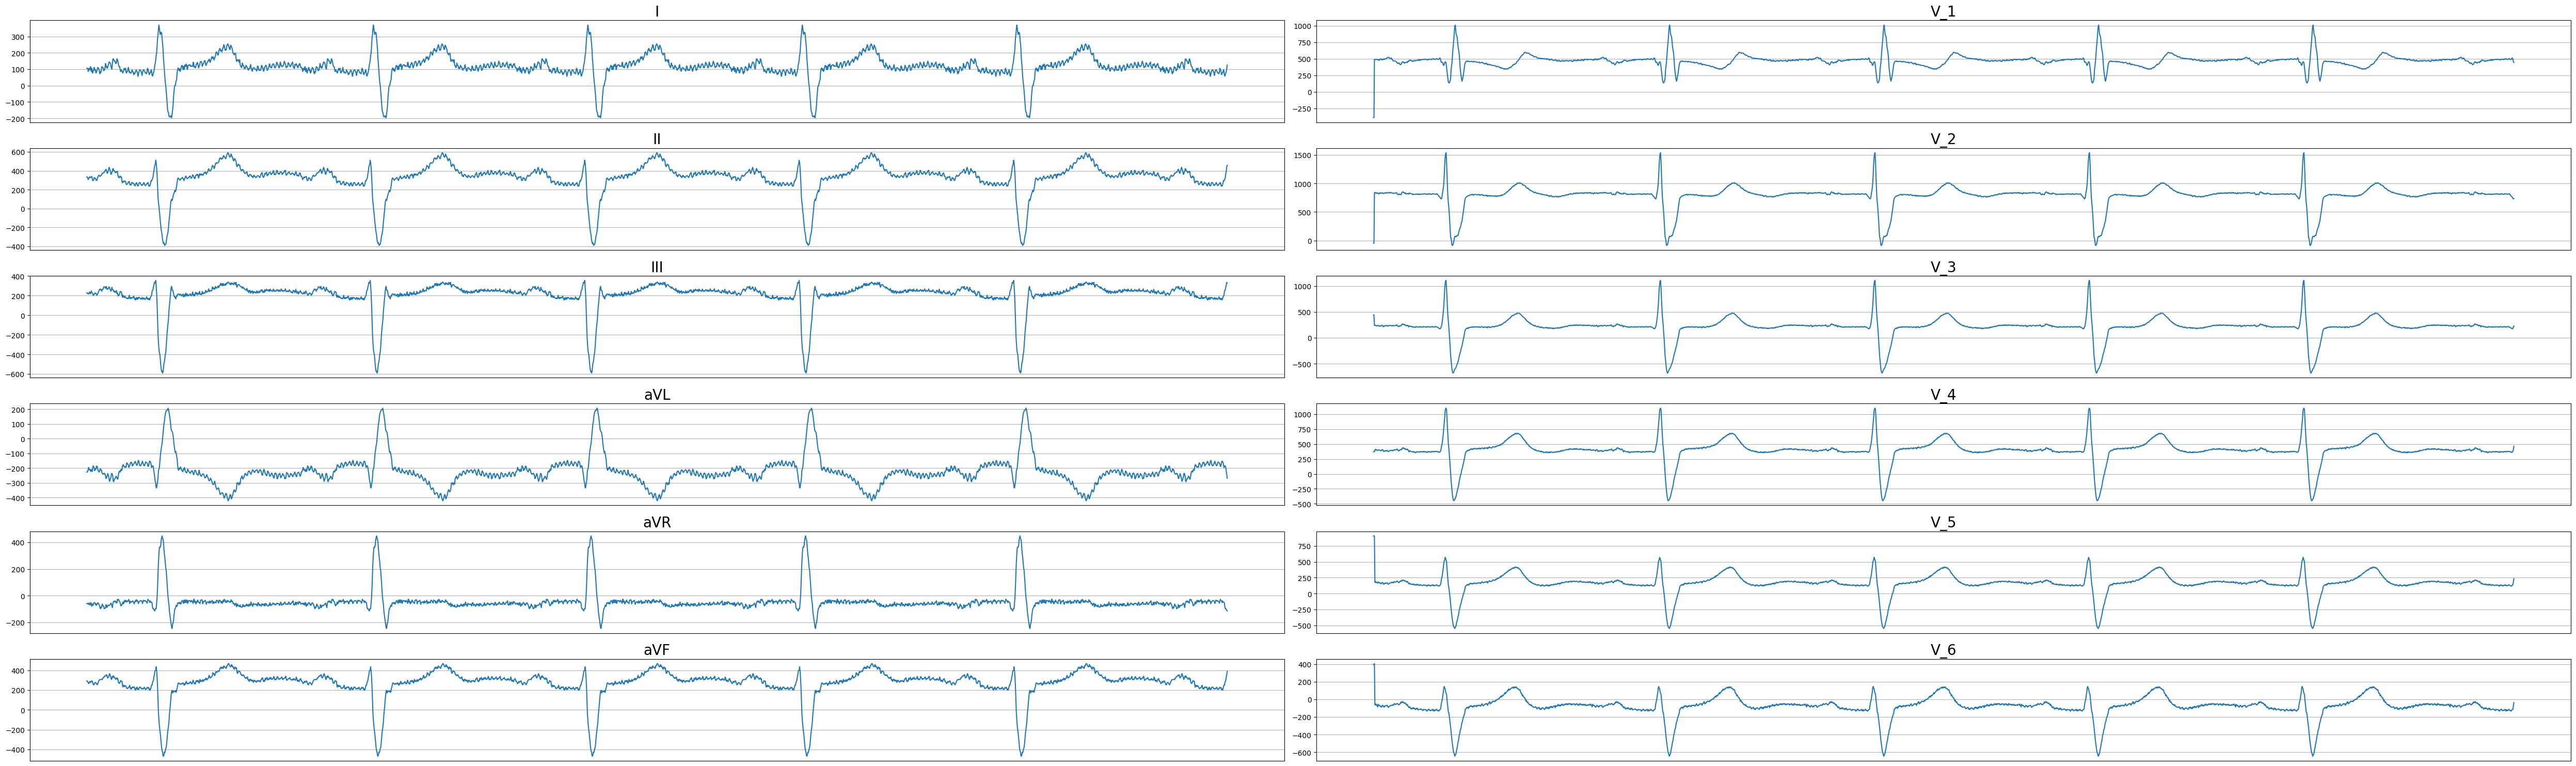

In [3]:
# Sprawdź liczbę kolumn
num_rows = len(data_frame)
start = input("Początek zakresu(Minimalnie 0): ")
end = input("Koniec zakresu(Maksymalnie "+str( num_rows )+"): ")
tick_rate = 72000
if start == "":
    start = 0
if end == "":
    end = num_rows

x = list(range(int( start ),int( end ))) 
new_data = data_frame.iloc[int( start ):int( end )].copy()
font = {'size':20}
num_rows = len(new_data)
minutes = num_rows/tick_rate
x_labels = np.linspace(0,minutes,int( minutes ))

if len( data_frame.columns ) == 12:
    column_names = ['I','II','III','aVL','aVR','aVF','V_1','V_2','V_3','V_4','V_5','V_6']  
    new_data.columns = column_names
    plt.figure(figsize=(50,15))
    j=0
    for i in range(1,12,2):
        plt.subplot(6,2,i)
        plt.plot(x,new_data[column_names[j]])
        plt.grid(True)
        plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
        plt.title(column_names[j],fontdict=font)
        j += 1
    for i in range(2,13,2):
        plt.subplot(6,2,i)
        plt.plot(x,new_data[column_names[j]])
        plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
        plt.grid(True) 
        plt.title(column_names[j],fontdict=font) 
        j += 1        
    plt.tight_layout()
    plt.show()

if len(new_data.columns) == 1:
    new_data.columns = ['data']
    font = {'size':20}
    plt.figure(figsize=(20,5))
    plt.plot(x,new_data['data'])
    plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
    plt.grid(True)
    plt.title("EKG")
    plt.show()

if len(new_data.columns) == 2:
    new_data.columns = ['I','data']
    font = {'size':20}
    plt.figure(figsize=(20,5))
    plt.plot(x,new_data['data'])
    plt.xticks(ticks=x_labels*tick_rate,labels=x_labels)
    plt.grid(True)
    plt.title("EKG")
 

Powyżej znajduję się wykres załadowany EKG dla pliku ekg1.txt (Dla plików ekg100.txt i ekg_noise.txt trzeba zmniejszyć zakres danych by wykres był bardziej czytelny)